#### DSPY Deep Dive

https://dspy-docs.vercel.app/docs/deep-dive/

After reviewing the tutorials, the 8 building blocks starting to dive deeper 
into the modules of dspy

##### Starting with Examples

In [1]:
from dspy import Example

qa_pair = Example(ques="This is question", answer="this is answer").with_inputs("ques")
qa_pair

Example({'ques': 'This is question', 'answer': 'this is answer'}) (input_keys={'ques'})

In [3]:
# accessing and updating
print(qa_pair.inputs())
print(qa_pair.labels())

Example({'ques': 'This is question'}) (input_keys=None)
Example({'answer': 'this is answer'}) (input_keys=None)


In [4]:
qa_pair.without("answer")

Example({'ques': 'This is question'}) (input_keys=None)

In [6]:
for k, v in qa_pair.items():
    print(f"{k} = {v}")

ques = This is question
answer = this is answer


In [8]:
# Using datasets
from dspy.datasets import HotPotQA, Colors
ds = HotPotQA(train_seed=1, train_size=5, eval_seed=2, dev_size=10, test_size=5)
ds

d:\dspyenv\Lib\site-packages\datasets\table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [9]:
trainset = [x.with_inputs('question') for x in ds.train]
devset = [x.with_inputs('question') for x in ds.dev]
testset = [x.with_inputs('question') for x in ds.test]
print(trainset)

[Example({'question': 'At My Window was released by which American singer-songwriter?', 'answer': 'John Townes Van Zandt'}) (input_keys={'question'}), Example({'question': 'which  American actor was Candace Kita  guest starred with ', 'answer': 'Bill Murray'}) (input_keys={'question'}), Example({'question': 'Which of these publications was most recently published, Who Put the Bomp or Self?', 'answer': 'Self'}) (input_keys={'question'}), Example({'question': 'The Victorians - Their Story In Pictures is a documentary series written by an author born in what year?', 'answer': '1950'}) (input_keys={'question'}), Example({'question': 'Which magazine has published articles by Scott Shaw, Tae Kwon Do Times or Southwest Art?', 'answer': 'Tae Kwon Do Times'}) (input_keys={'question'})]


How HotPotQA dataset work?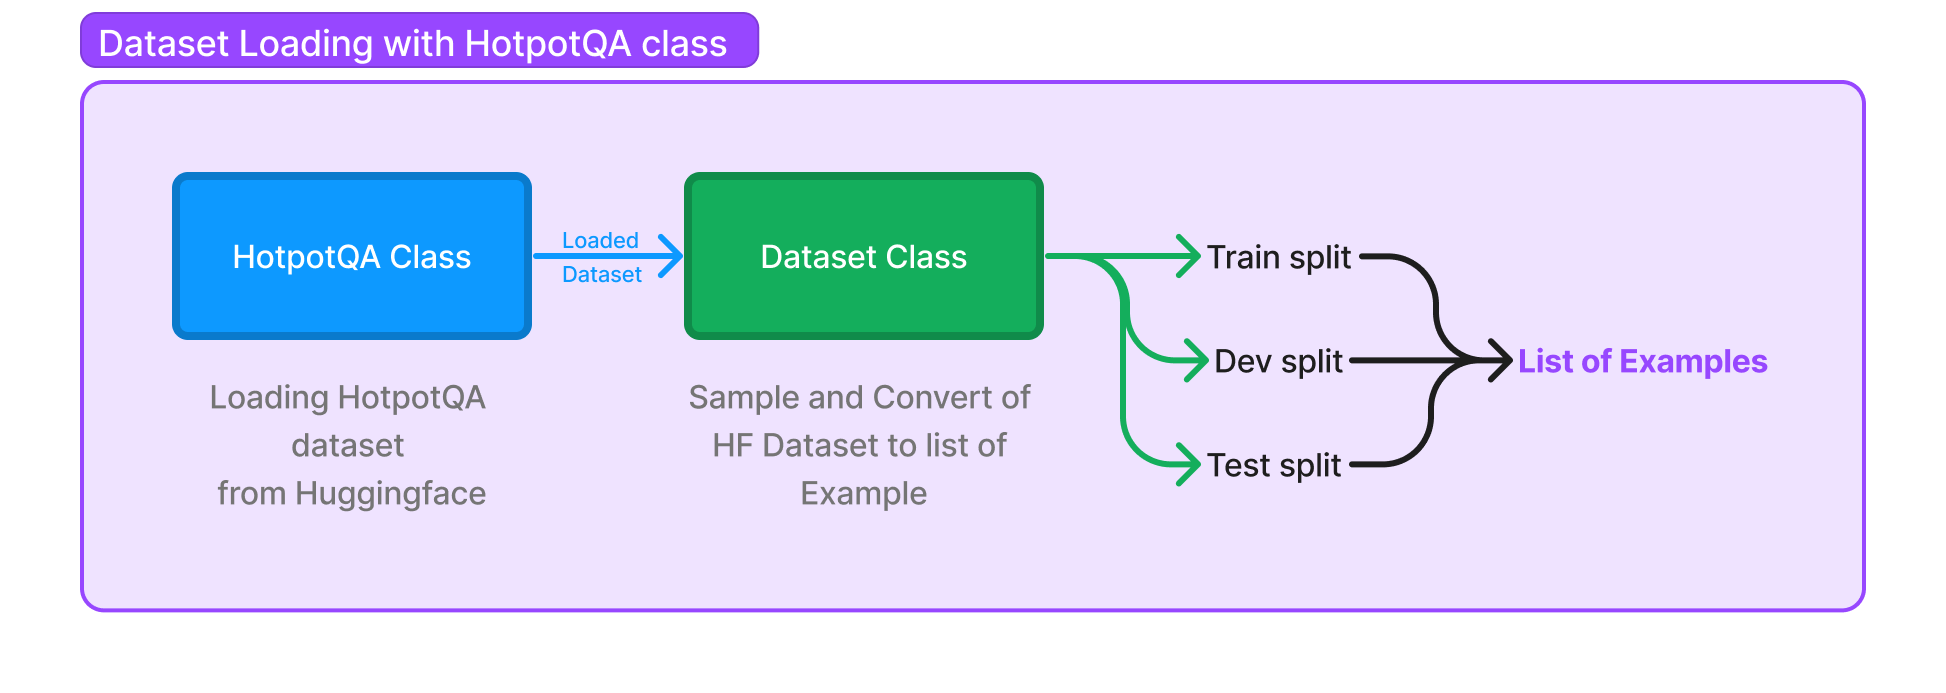

#### What is a Signature?

In the typical LLM pipeline, you'll have two key components at work i.e. an LLM and a prompt. In DSPy, we have an LLM configured at the beginning of any DSPy script via the LM(Language Model - which is shown in the next blog) and a prompt defined via Signatures.
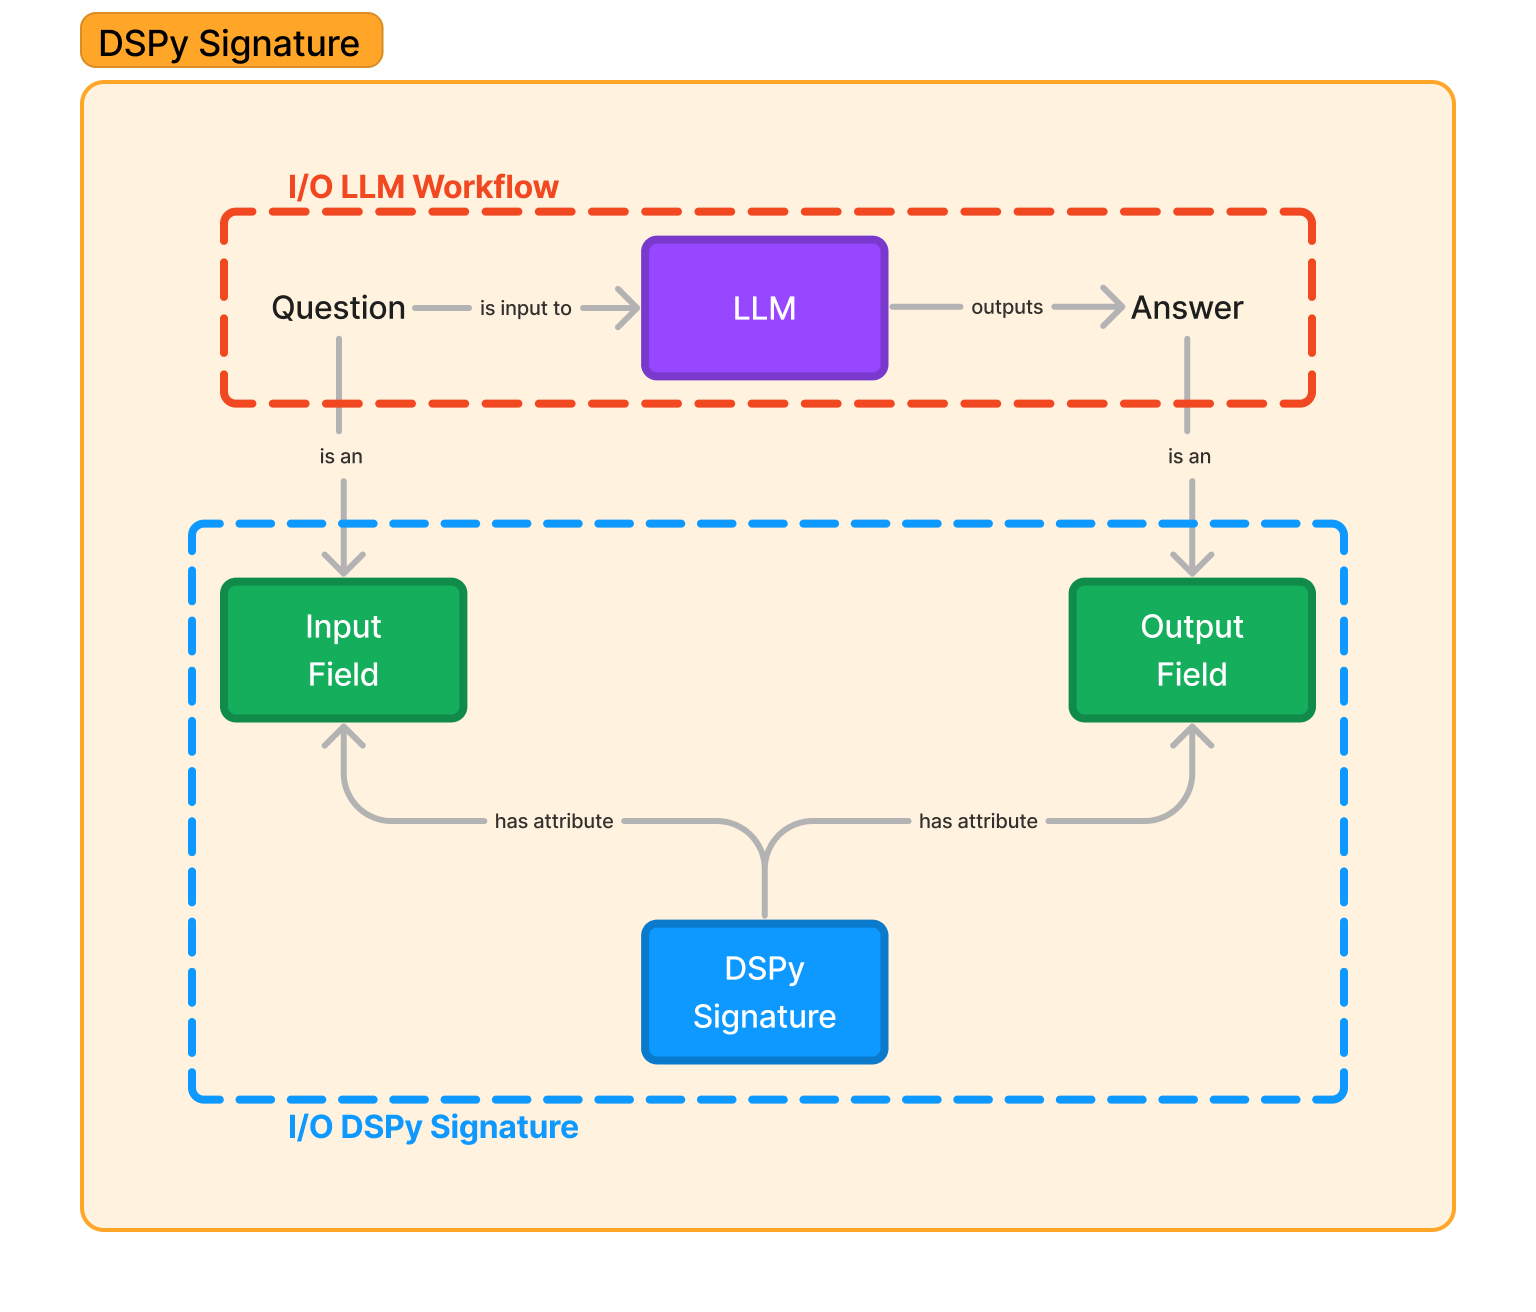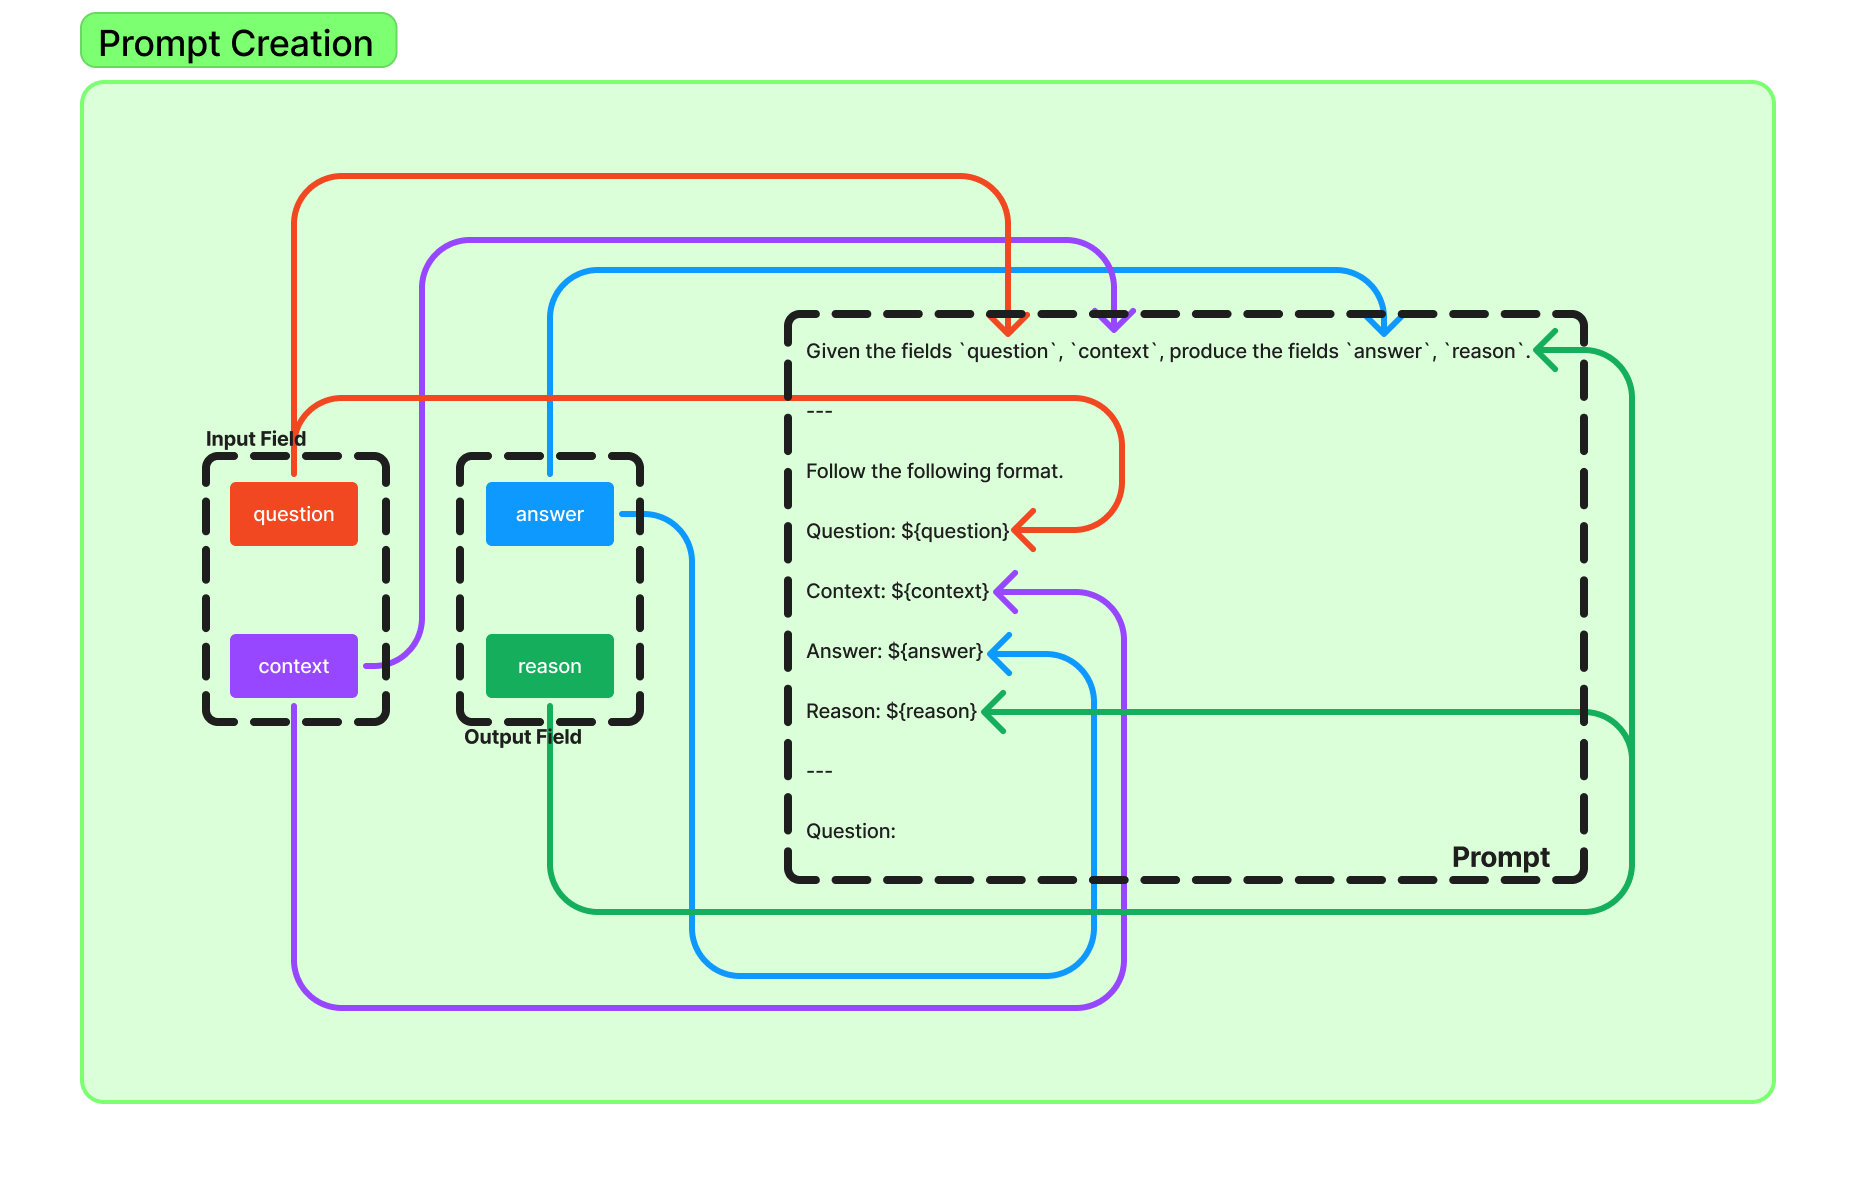


### How Predict Module Works

How does Predict module actually 'predict' though? Here is a step-by-step breakdown:

A call to the predictor will get executed in __call__ method of Predict Module which executes the forward method of the class.

In forward method, DSPy initializes the signature, LM call parameters and few-shot examples, if any.

The _generate method formats the few shots example to mirror the signature and uses the LM object we configured to generate the output as a Prediction object.

In [ ]:
# connecting to Ollam model 
import dspy

lm = dspy.OllamaLocal(model='mistral',base_url='http://aicontroller:11434',
                      max_tokens=200)

In [ ]:
llama = dspy.HFModel(model = 'meta-llama/Llama-2-7b-hf',)